# **Predict Customers Churn with Machine Learning**
---

**Problem Statement** <br>
Pelanggan memiliki hak dalam memilih provider yang sesuai dan
dapat beralih dari provider sebelumnya yang diartikan sebagai
Customer Churn. Peralihan ini dapat menyebabkan berkurangnya pendapatan bagi
perusahaan telekomunikasi sehingga penting untuk ditangani. Dari masalah tersebut perlu dilakukan prediksi customer churn. Prediksi ini penting diketahui oleh perusahaan agar bisa memetakan strategi bisnis untuk mempertahankan pelanggan.<br>
<br>

**Objective** <br>
Membuat model machine learning yang dapat memprediksi customer yang churn.<br>
<br>

**Deskripsi Fitur Dataset** <br>

Fitur Name | Description
-----------|------------
state | US State
account_length | Total bulan customer menjadi user telco provider
area_code | Kode Area
International_plan | Customer memiliki plan international
voice mail plan | Customer memiliki plan voice mail
number_vmail messages | Total pesan voice mail
total_day_minutes | Total minutes pada day calls
total_day_calls | Total day calls
total_day_charge | Total charge dari day calls
total_eve_minutes | Total menit pada evening call
total_eve_calls | Total evening call
total_eve_charge | Total charge pada evening call
total_night_minutes | Total menit pada night call
total_night_calls | Total night call
total_night_charge | Total charge pada night call
total_int_minutes | Total menit pada international call
total_intl_calls | Total international call
total_int_charge | Total charge pada international call
number_customer_service_calls | Total call kepada customer service
churn | Customer churn



## **Load Dataset**
---

In [2]:
# import library
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt   
%matplotlib inline
import warnings                
warnings.filterwarnings("ignore")
from IPython.display import clear_output

**Data Train**

In [3]:
# load data train
url = 'https://drive.google.com/file/d/1S6VXIDtKuN98kP0pr-PQWfvY2AxJpliS/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
# -------------------------------
df = pd.read_csv(dwn_url)

In [4]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

**Data Test**

In [5]:
# load data test
url_test = 'https://drive.google.com/file/d/1lcPBOHjqtkz4xgwSdiak4CL2cLyip3AT/view?usp=sharing'
file_id_test = url_test.split('/')[-2]
dwn_url_test = 'https://drive.google.com/uc?id=' + file_id_test
# -------------------------------
df_test = pd.read_csv(dwn_url_test)

In [6]:
df_test.columns

Index(['id', 'state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

## **EDA**
---

### Overview Data

In [7]:
# jumlah baris dan fitur
df.shape

(4250, 20)

In [8]:
# melihat ringkasan data
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, 
                      df[col].isna().sum(), 
                      round(100*df[col].isna().sum()/len(df[col]), 2), 
                      df[col].nunique(), 
                      df[col].unique()[:10]])

df_desc = pd.DataFrame(data=list_item, columns='feature, datatype, null_values, null_percentage, unique_values, unique_sample'.split(","))
df_desc

,feature,datatype,null_values,null_percentage,unique_values,unique_sample
0,state,object,0,0.0,51,"[OH, NJ, OK, MA, MO, LA, WV, IN, RI, IA]"
1,account_length,int64,0,0.0,215,"[107, 137, 84, 75, 121, 147, 117, 141, 65, 74]"
2,area_code,object,0,0.0,3,"[area_code_415, area_code_408, area_code_510]"
3,international_plan,object,0,0.0,2,"[no, yes]"
4,voice_mail_plan,object,0,0.0,2,"[yes, no]"
5,number_vmail_messages,int64,0,0.0,46,"[26, 0, 24, 37, 27, 33, 39, 25, 30, 41]"
6,total_day_minutes,float64,0,0.0,1843,"[161.6, 243.4, 299.4, 166.7, 218.2, 157.0, 184..."
7,total_day_calls,int64,0,0.0,120,"[123, 114, 71, 113, 88, 79, 97, 84, 137, 127]"
8,total_day_charge,float64,0,0.0,1843,"[27.47, 41.38, 50.9, 28.34, 37.09, 26.69, 31.3..."
9,total_eve_minutes,float64,0,0.0,1773,"[195.5, 121.2, 61.9, 148.3, 348.5, 103.1, 351...."


In [9]:
# cek duplikat
df.duplicated().sum()

0

In [10]:
numeric = []
for col in df.columns:
  if df[col].dtype != object:
    numeric.append(col)

print(numeric)
print(f'jumlah fitur numric :{len(numeric)}')

['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']
jumlah fitur numric :15


In [11]:
categorical = []
for col in df.columns:
  if df[col].dtype == object:
    categorical.append(col)

print(categorical)
print(f'jumlah fitur Categorical :{len(categorical)}')

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']
jumlah fitur Categorical :5


**Insight :**
- Dataset terdiri dari 4250 baris dan 20 fitur (15 fitur numerikal dan 5 fitur kategorikal)
- Dataset tidak memiliki null/missing value
- Dataset tidak memiliki baris yang duplikat

### Statistical Summary

In [12]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.24,39.70,1.0,73.00,100.00,127.00,243.00
number_vmail_messages,4250.0,7.63,13.44,0.0,0.00,0.00,16.00,52.00
total_day_minutes,4250.0,180.26,54.01,0.0,143.33,180.45,216.20,351.50
total_day_calls,4250.0,99.91,19.85,0.0,87.00,100.00,113.00,165.00
total_day_charge,4250.0,30.64,9.18,0.0,24.36,30.68,36.75,59.76
total_eve_minutes,4250.0,200.17,50.25,0.0,165.92,200.70,233.78,359.30
total_eve_calls,4250.0,100.18,19.91,0.0,87.00,100.00,114.00,170.00
total_eve_charge,4250.0,17.02,4.27,0.0,14.10,17.06,19.87,30.54
total_night_minutes,4250.0,200.53,50.35,0.0,167.22,200.45,234.70,395.00
total_night_calls,4250.0,99.84,20.09,0.0,86.00,100.00,113.00,175.00


In [13]:
df[categorical].describe().T

,count,unique,top,freq
state,4250,51,WV,139
area_code,4250,3,area_code_415,2108
international_plan,4250,2,no,3854
voice_mail_plan,4250,2,no,3138
churn,4250,2,no,3652


### Analyzing Feature

#### Univariate Analylis 

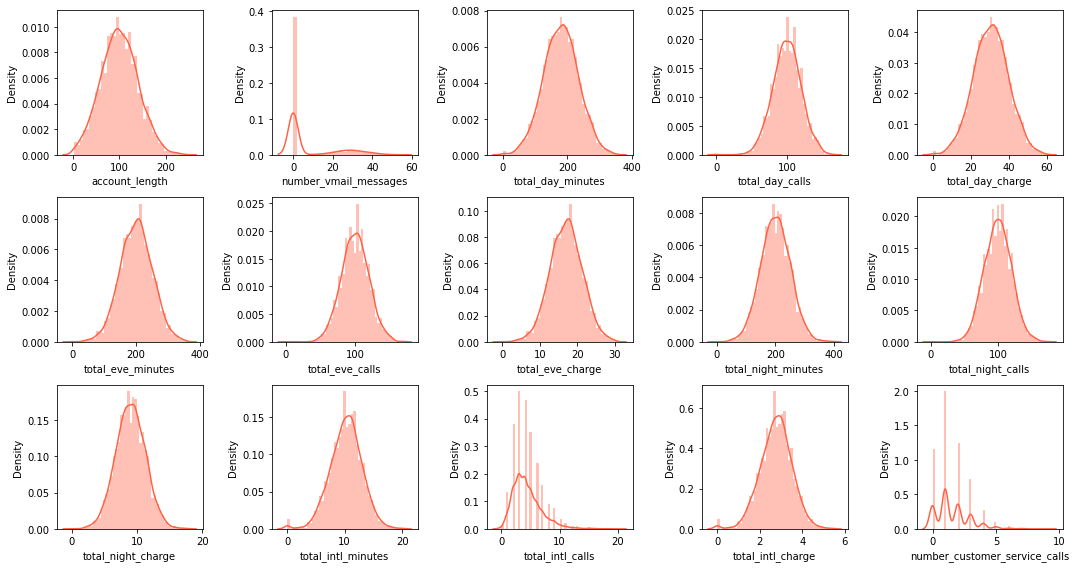

In [14]:
plt.figure(figsize=(15, 8))
for i in range(0, len(numeric)):
    plt.subplot(3, 5, i+1)
    sns.distplot(df[numeric[i]], color='tomato')
    plt.tight_layout()

- Fitur numerical cenderung terdistribusi normal
- Fitur `number_vmail_massages`, `total_intl_calls` dan `number_customer_sevice_calls` cenderung positively skewed

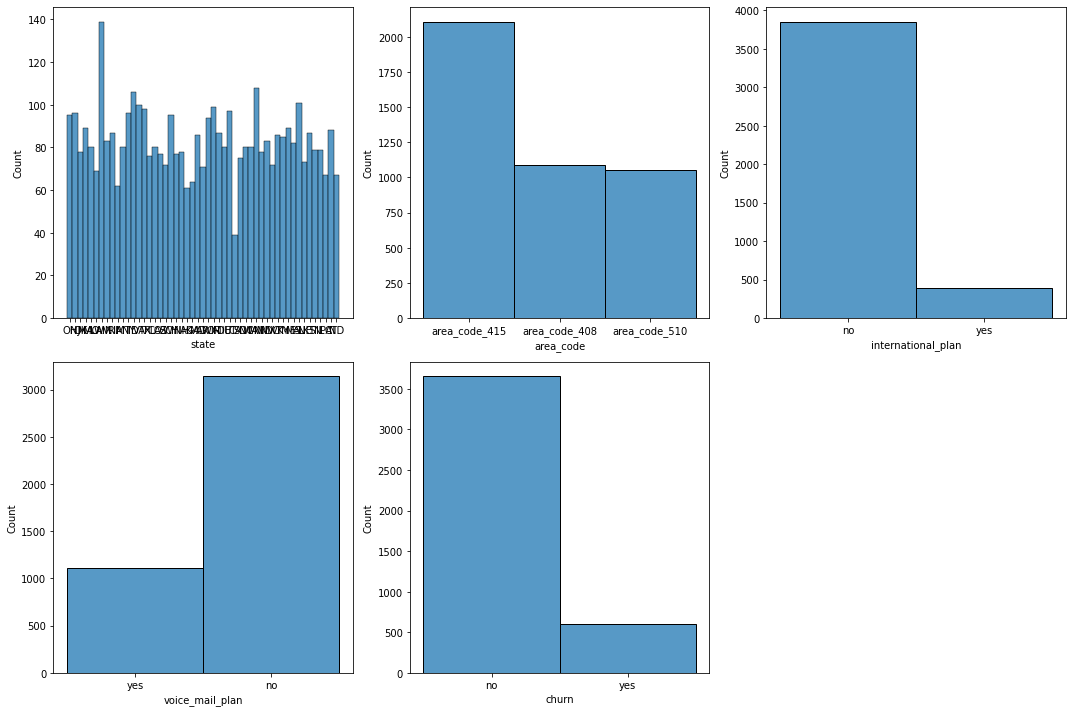

In [15]:
plt.figure(figsize=(15, 10))
for i in range (0,len(categorical)):
  plt.subplot(2, 3, i+1)
  cat = categorical[i]
  sns.histplot(x=df[cat], kde=False)
  # plt.xticks(rotation=90)
  plt.tight_layout()

Text(0.5, 1.0, 'Percentages of Customer Churn\n')

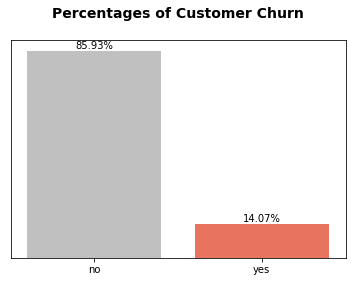

In [16]:
counts = df['churn'].value_counts()
percentages = counts / counts.sum() * 100
ax = sns.barplot(x=counts.index, y=percentages, palette =['silver', 'tomato'])
for i, v in enumerate(percentages):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
ax.set_yticks([])
plt.ylabel('')
plt.title('Percentages of Customer Churn\n', fontsize=14, fontweight = 'bold')

Insight: 

- Mayoritas customer berasal dari wilayah WV pada kode area 415
- Mayoritas customer tidah churn (lebih dari 3000)
- Customer cenderung tidak memiliki plan internasional dan voice mail

#### Bivariate Analylis 

In [17]:
def churn(df,colName):
  col_churned = df[df['churn']=='yes'][colName]
  col_not_churned = df[df['churn']=='no'][colName]
  sns.distplot(col_churned,label='Churned')
  sns.distplot(col_not_churned,label='Not Churned')
  plt.title('Distribution of '+ colName +' for Churned and Not Churned')
  plt.legend()
  plt.show()

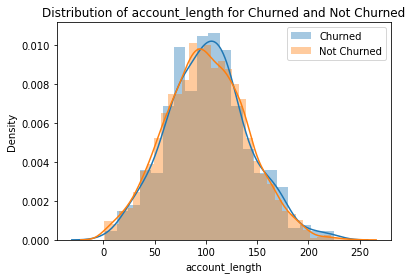

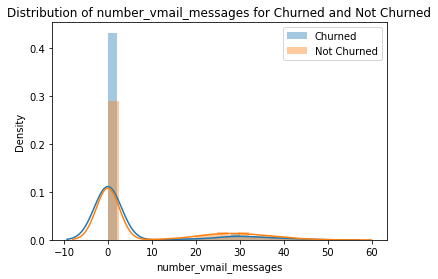

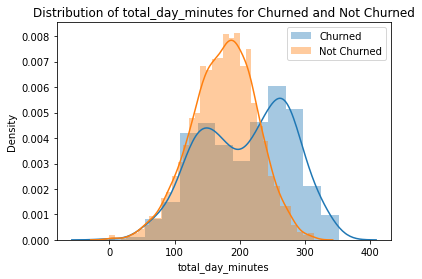

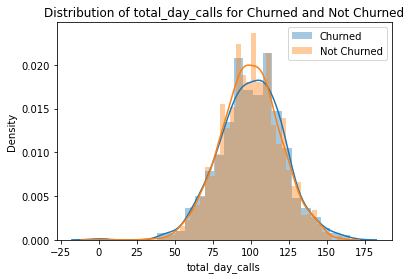

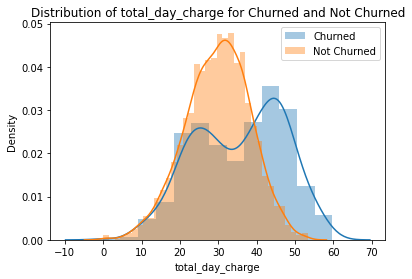

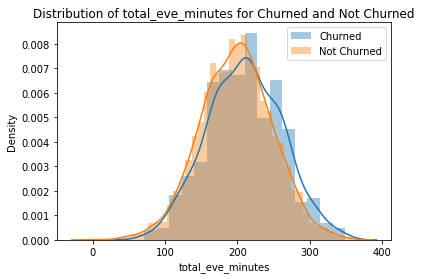

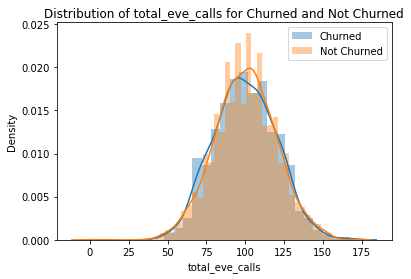

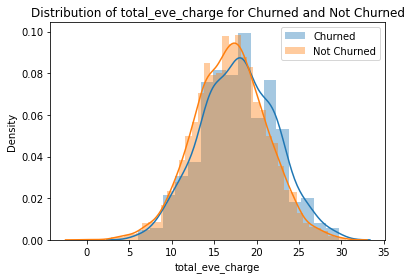

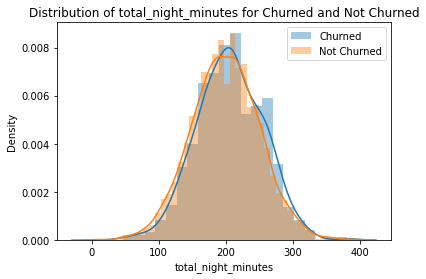

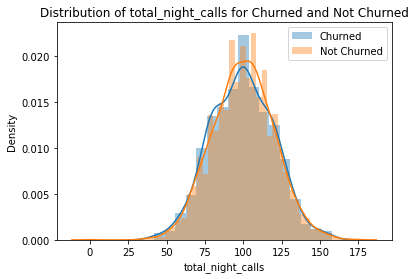

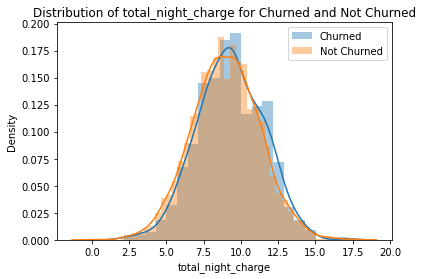

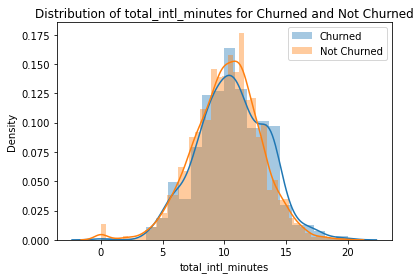

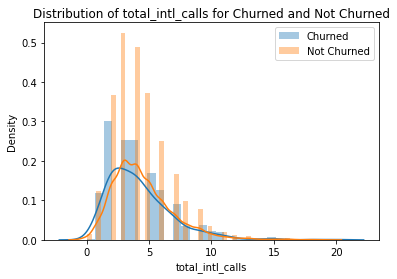

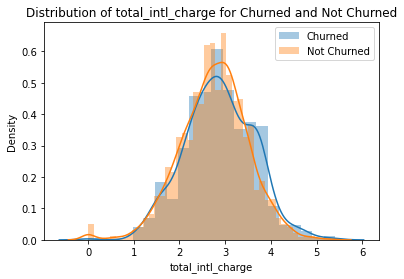

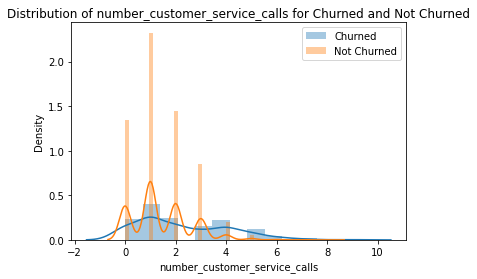

<Figure size 432x288 with 0 Axes>

In [18]:
for i in range (0,len(numeric)):
  num = numeric[i]
  churn(df,num)
  plt.tight_layout()

In [19]:
# mengkalkulasi rasio dan pivoting
def ratio_with_target(feats):
  ratio_df = df.groupby([feats,'churn']).agg({'account_length':'count'}).reset_index()
  ratio_df['ratio'] = ratio_df.groupby(feats).apply(lambda x: round(x.account_length/x.account_length.sum() *100, 0)).values.astype(int)
  ratio_df = ratio_df.pivot_table(index=feats, columns='churn', values='ratio')
  ratio_df = ratio_df.sort_values(by=['yes'], ascending=False)
  return ratio_df

#---------------------------------------------------------------------------------------------------------

# visualisasi
def cat_plotting(fitur, judul):
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    
    # count
    ax[0].set_title(f'Churn Distribution by {judul}\n', fontsize=16, fontweight = 'bold')
    sns.countplot(x=fitur, data = df, hue = 'churn', palette = ['silver', 'tomato'] , ax=ax[0])
    ax[0].bar_label(ax[0].containers[0], fontsize=14) 
    ax[0].bar_label(ax[0].containers[1], fontsize=14)
    ax[0].set_yticks([])
    ax[0].set_xlabel('')
    ax[0].set_ylabel('')
    
    #percentage
    ax[1].set_title(f'Pecentage of Churn by {judul}\n', fontsize=16, fontweight = 'bold')
    ratio_with_target(fitur).plot(kind='barh', stacked=True, color = ['silver', 'tomato'], ax=ax[1])
    for p in ax[1].patches:
        left, bottom, width, height = p.get_bbox().bounds
        if width != 0:
            ax[1].annotate((str(round(width, 2))+'%'), xy=(left+width/2, bottom+height/2), 
                        ha='center', va='center', fontsize=14)
    plt.legend([])
    ax[1].set_xticks([])
    ax[1].set_xlabel('')
    ax[1].set_ylabel('')

    plt.tight_layout()
    plt.show()

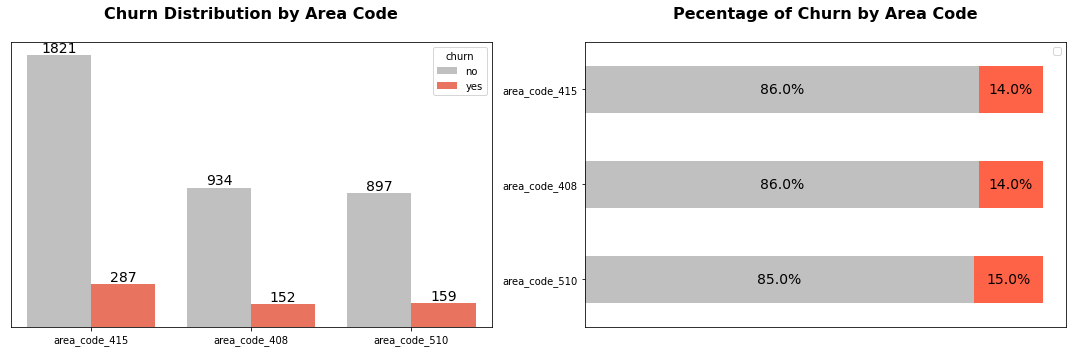

In [20]:
cat_plotting('area_code', 'Area Code')

- Area 415 memiliki jumlah (count) customer paling tinggi.
- Secara rasio, pada setiap area memiliki persentase customer yang churn tidak jauh berbeda yaitu 14 - 15 %

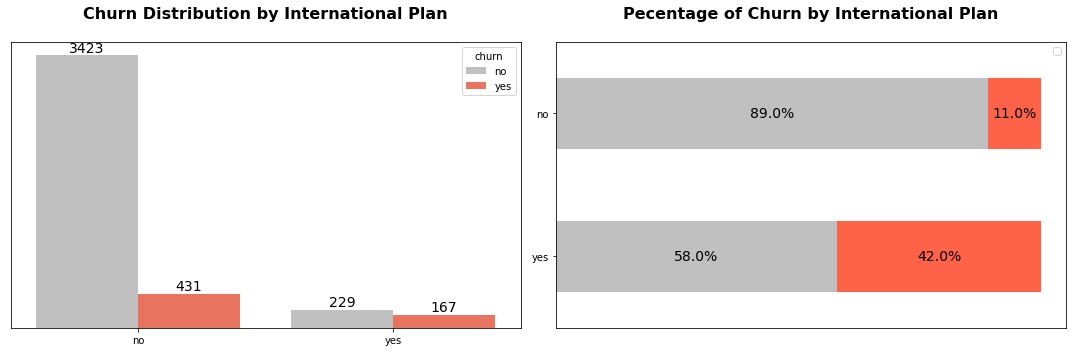

In [21]:
cat_plotting('international_plan', 'International Plan')

- Meskipun angka customer yang memiliki International plan cukup rendah namun, 42% nya adalah custome churn.
- Tingkat churn pada customer yang tidak memiliki International plan hanya sebesar 11%.

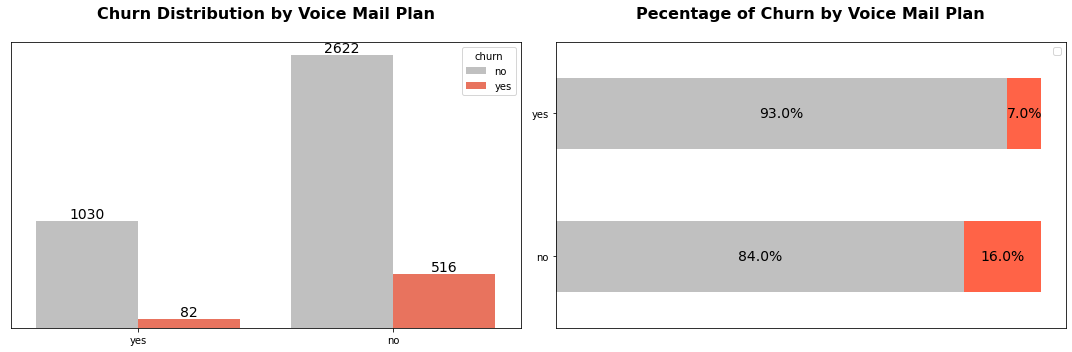

In [22]:
cat_plotting('voice_mail_plan', 'Voice Mail Plan')

- Sama halnya meskipun jumlah (count) lebih rendah, customer yang memiliki voice mail plan cenderung juga memiliki tingkat churn paling tinggi yaitu 16% dibandingkan dengan yang tidak memiliki.

In [23]:
def cat_plotting_state(fitur, judul):
    fig, ax = plt.subplots(2,1, figsize=(15,15))
    
    # count
    ax[0].set_title(f'Count of Churn Distribution by {judul}\n', fontsize=16, fontweight = 'bold')
    sns.countplot(x=fitur, data = df, hue = 'churn', palette = ['steelblue', 'darkorange'], ax=ax[0])
    ax[0].bar_label(ax[0].containers[0], fontsize=9) 
    ax[0].bar_label(ax[0].containers[1], fontsize=9)
    ax[0].set_yticks([])
    ax[0].set_xlabel('')
    ax[0].set_ylabel('')
    
    #percentage
    ax[1].set_title(f'Pecentage of Churn Distribution by {judul}\n', fontsize=16, fontweight = 'bold')
    ratio_with_target(fitur).plot(kind='barh', stacked=True, color = ['steelblue', 'darkorange'], ax=ax[1])
    for p in ax[1].patches:
        left, bottom, width, height = p.get_bbox().bounds
        if width != 0:
            ax[1].annotate((str(round(width, 2))+'%'), xy=(left+width/2, bottom+height/2), 
                        ha='center', va='center', fontsize=9)
    plt.legend([])
    ax[1].set_xticks([])
    ax[1].set_xlabel('')
    ax[1].set_ylabel('')

    plt.tight_layout()
    plt.show()

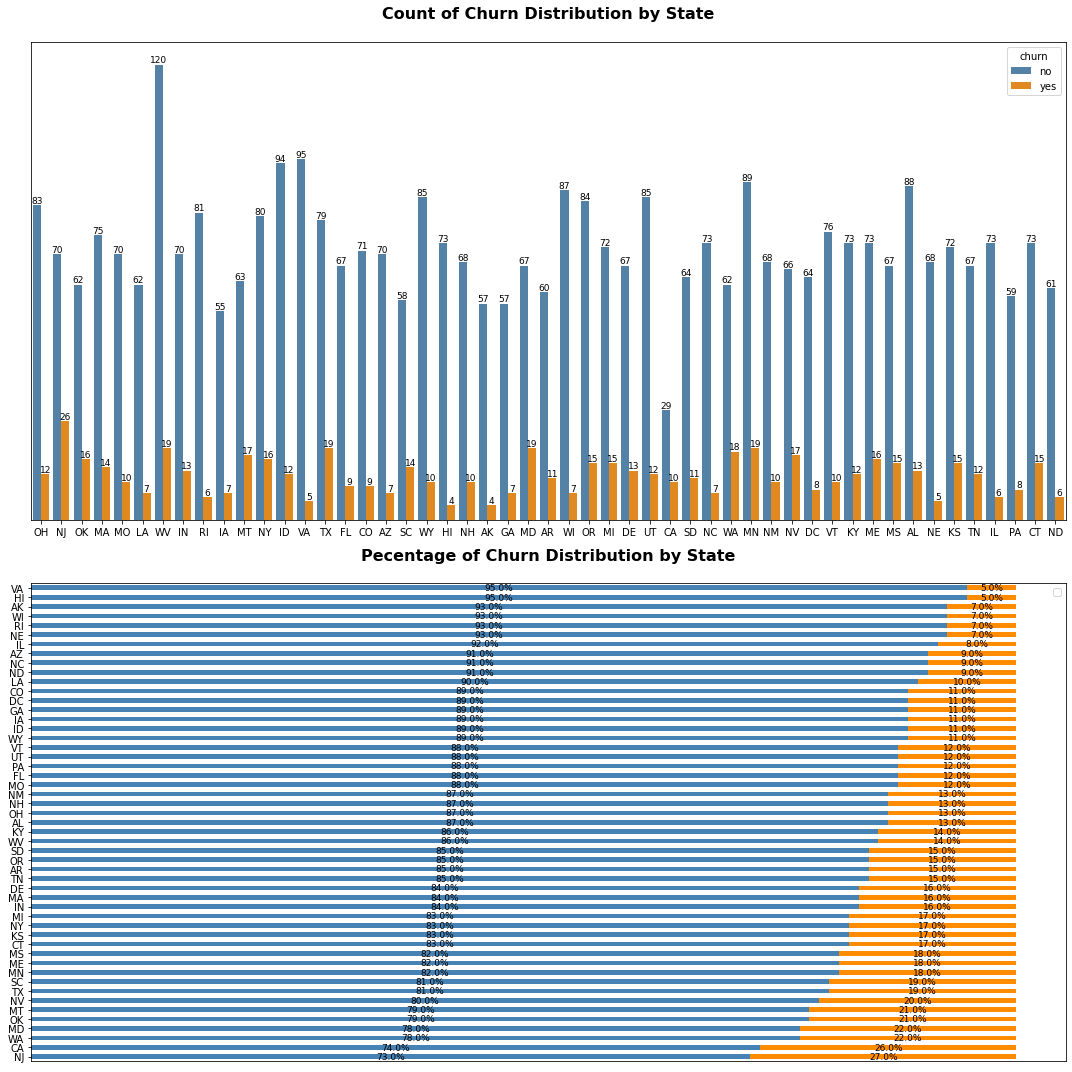

In [24]:
cat_plotting_state('state', 'State')

- Tedapat banyak nilai unique di dalam fitur state

#### Multivariate Analysis

In [25]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

##### Calls in day

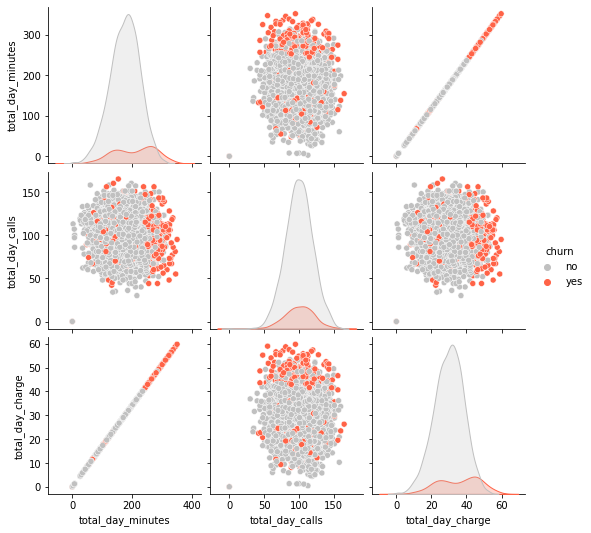

In [26]:
sns.pairplot(df[['total_day_minutes', 'total_day_calls', 'total_day_charge', 'churn']], hue = 'churn', palette=['silver', 'tomato'])


In [27]:
print('Average charge per minutes in day call: {:.2f}'.format(df['total_day_charge'].mean()/df['total_day_minutes'].mean()))
print('Average minutes per calls in day call: {:.2f}'.format(df['total_day_minutes'].mean()/df['total_day_calls'].mean()))


Average charge per minutes in day call: 0.17
Average minutes per calls in day call: 1.80


##### Calls in evening

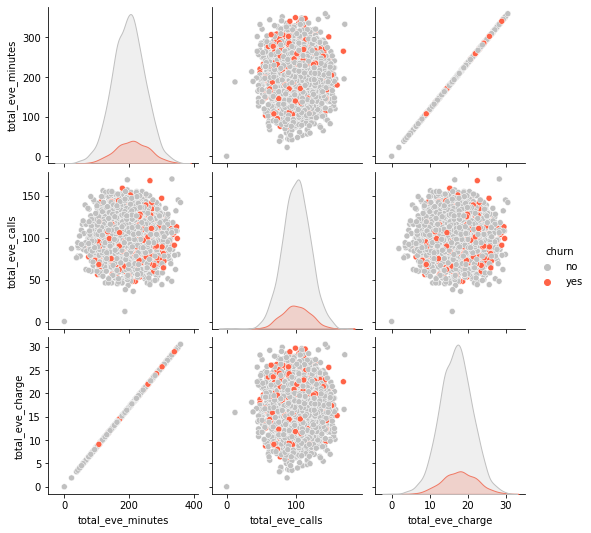

In [28]:
sns.pairplot(df[['total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'churn']], hue = 'churn', palette=['silver', 'tomato'])

In [29]:
print('Average charge per minutes in evening call: {:.2f}'.format(df['total_eve_charge'].mean()/df['total_eve_minutes'].mean()))
print('Average minutes per calls in evening call: {:.2f}'.format(df['total_eve_minutes'].mean()/df['total_eve_calls'].mean()))


Average charge per minutes in evening call: 0.09
Average minutes per calls in evening call: 2.00


##### Calls in night

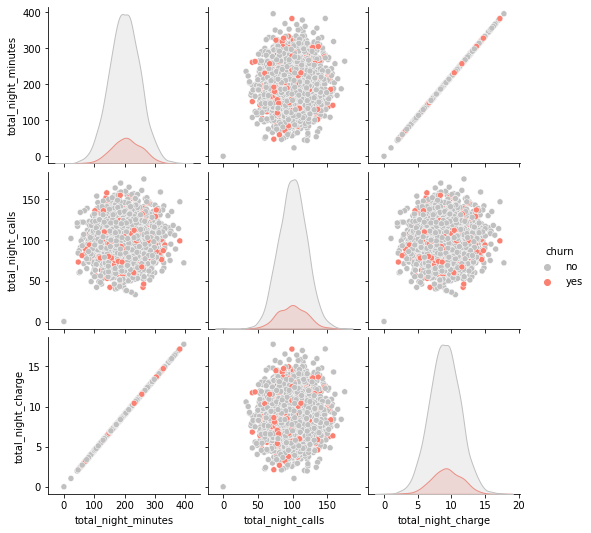

In [30]:
sns.pairplot(df[['total_night_minutes', 'total_night_calls', 'total_night_charge', 'churn']], hue = 'churn', palette=['silver', 'salmon'])

In [31]:
print('Average charge per minutes in night call: {:.2f}'.format(df['total_night_charge'].mean()/df['total_night_minutes'].mean()))
print('Average minutes per calls in night call: {:.2f}'.format(df['total_night_minutes'].mean()/df['total_night_calls'].mean()))

Average charge per minutes in night call: 0.05
Average minutes per calls in night call: 2.01


##### International calls

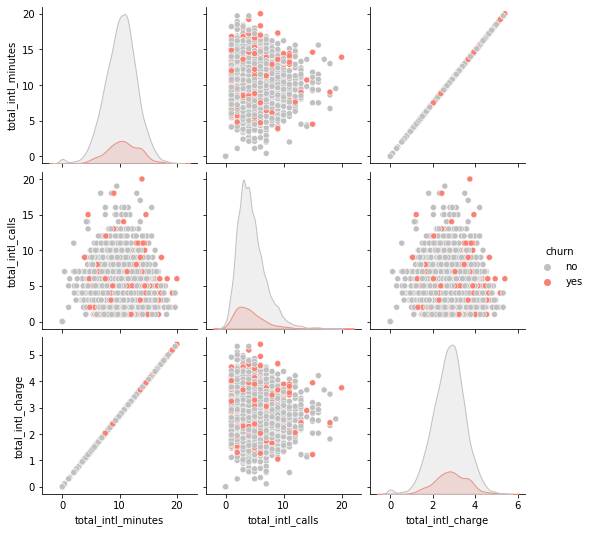

In [32]:
sns.pairplot(df[['total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'churn']], hue = 'churn', palette=['silver', 'salmon'])

In [33]:
print('Average charge per minutes in international call: {:.2f}'.format(df['total_intl_charge'].mean()/df['total_intl_minutes'].mean()))
print('Average minutes per calls in international call: {:.2f}'.format(df['total_intl_minutes'].mean()/df['total_intl_calls'].mean()))

Average charge per minutes in international call: 0.27
Average minutes per calls in international call: 2.32


## **Data Prepocessing**

### Outlier

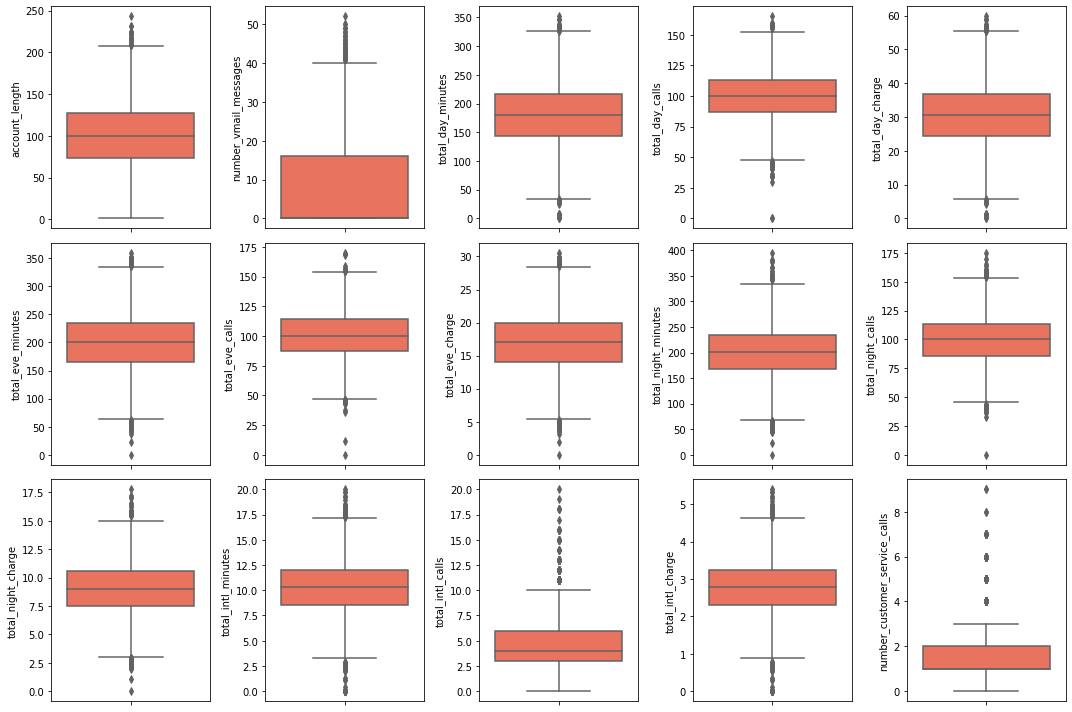

In [34]:
#cek outlier
plt.figure(figsize=(15, 10))
for i in range (0,len(numeric)):
  plt.subplot(3, 5, i+1)
  num = numeric[i]
  sns.boxplot(y=df[num], color='tomato')
  # plt.figure(figsize=(3,3))
  plt.tight_layout()

In [35]:
# cleaning outlier
# def cleaning_outlier(df,colName):
#   q1 = df[colName].quantile(0.25)
#   q3 = df[colName].quantile(0.75)
#   iqr = q3 - q1
#   low = q1 - (1.5*iqr)
#   high = q3 + (1.5*iqr)
#   filtered = df[(df[colName]>=low) & (df[colName]<=high)]
#   return filtered

# df_clean = cleaning_outlier(df,'total_day_calls')
# df_clean = cleaning_outlier(df_clean,'total_eve_calls')
# df_clean = cleaning_outlier(df_clean,'total_intl_calls')
# df_clean = cleaning_outlier(df_clean,'total_night_calls')
# df_clean = cleaning_outlier(df_clean,'number_customer_service_calls')

In [36]:
# print('Data used is',round(df_clean.shape[0]/df.shape[0]*100,2),'%')

### Encoding

In [37]:
df_en = df.copy()

In [38]:
# bool_feats = 'international_plan', 'voice_mail_plan', 'churn'
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# ----------------------
for col in df_en.columns:
    if df_en[col].dtype == 'O':
        df_en[col] = le.fit_transform(df_en[col])

In [39]:
df_en['churn'].value_counts()

0    3652
1     598
Name: churn, dtype: int64

### Feature Selection

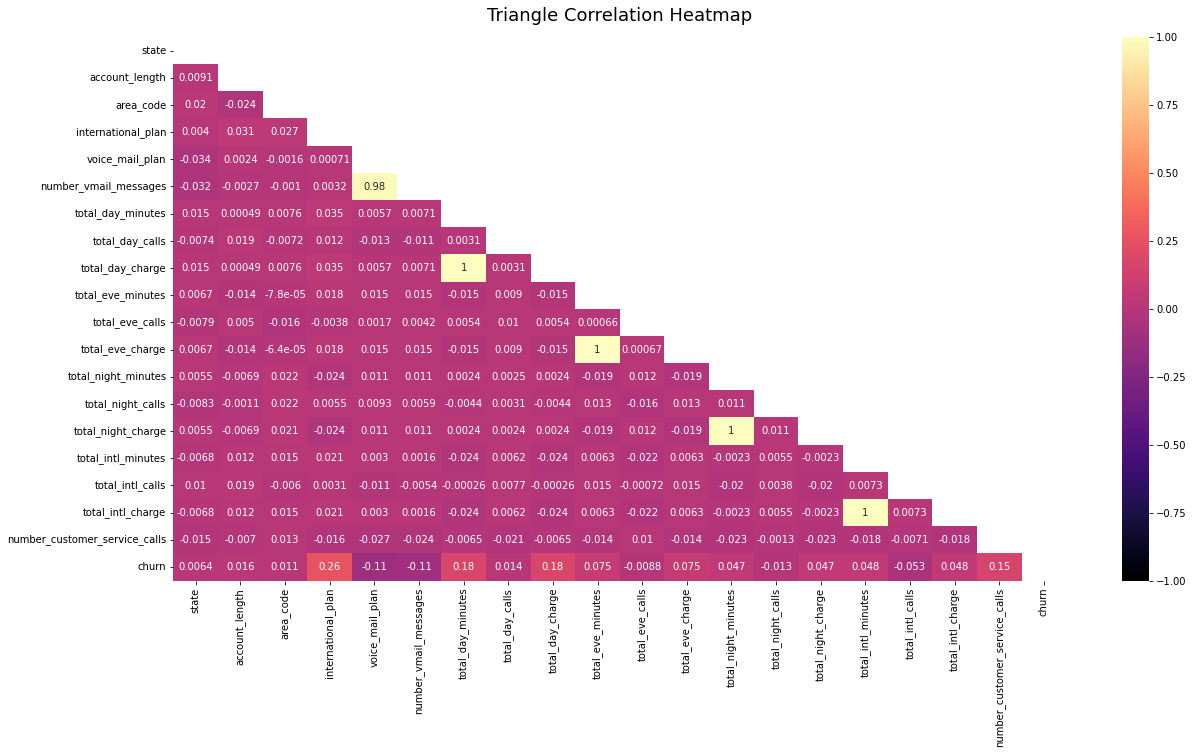

In [40]:
plt.figure(figsize=(20, 10))
corr_matrix = df_en.corr(method='spearman')
mask = np.triu(np.ones_like(corr_matrix,dtype=np.bool))
heatmap = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='magma')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [41]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] >= 0.8)]


# Print the list of redundant feats
for feature in to_drop:
    corr_value = corr_matrix[feature][corr_matrix[feature] >= 0.8]
    print(f"{feature}: {list(corr_value.index)} (Correlation Values: {list(corr_value)})")


number_vmail_messages: ['voice_mail_plan', 'number_vmail_messages'] (Correlation Values: [0.9843505975685432, 1.0])
total_day_charge: ['total_day_minutes', 'total_day_charge'] (Correlation Values: [1.0, 1.0])
total_eve_charge: ['total_eve_minutes', 'total_eve_charge'] (Correlation Values: [0.999999786466728, 1.0])
total_night_charge: ['total_night_minutes', 'total_night_charge'] (Correlation Values: [0.9999988534695725, 1.0])
total_intl_charge: ['total_intl_minutes', 'total_intl_charge'] (Correlation Values: [1.0, 1.0])


In [42]:
corelation = df_en.drop(columns=['number_vmail_messages', 'total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes'])
corelation.corr(method='spearman').abs()['churn'].sort_values(ascending=False)

churn                            1.000000
international_plan               0.259053
total_day_charge                 0.177430
number_customer_service_calls    0.151685
voice_mail_plan                  0.114643
total_eve_charge                 0.074796
total_intl_calls                 0.053213
total_intl_charge                0.047769
total_night_charge               0.046852
account_length                   0.015682
total_day_calls                  0.013809
total_night_calls                0.012685
area_code                        0.010653
total_eve_calls                  0.008819
state                            0.006448
Name: churn, dtype: float64

In [43]:
#select fitur
unselected_list = ['number_vmail_messages', 'total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes', 'state']

df_setected = df_en.drop(columns=unselected_list)

In [44]:
df_setected.sample(3)

,account_length,area_code,international_plan,voice_mail_plan,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
990,154,2,0,1,82,32.69,134,14.05,74,9.23,1,2.43,2,0
2163,120,0,0,1,123,36.69,76,24.24,78,8.64,3,1.86,1,0
4159,39,1,0,1,122,39.22,85,17.60,73,9.40,1,2.48,3,0


## **Modeling**

### Standardization

In [45]:
df_model = df_setected.copy()

In [46]:
# mengelompokkan fitur dan target
X = df_model.drop(columns='churn').copy()
y = df_model['churn'].copy()

In [47]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# -----------------------------------------------------
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

### Split Train Test

In [48]:
from sklearn.model_selection import train_test_split
# ---------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print(X_train.shape, X_test.shape)

(2975, 13) (1275, 13)


In [49]:
y_train.value_counts()

0    2550
1     425
Name: churn, dtype: int64

imbalanced class : menggunakan Kfold untuk model

### Model Expriment

#### Define Function

In [50]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

def predict(model) :
    # Prediksi label pada data uji
    y_pred = model.predict(X_test)
    
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    # Evaluasi model menggunakan classification report
    report = (classification_report(y_test, y_pred))

    # AUC
    rtest = roc_auc_score(y_test, y_pred_proba[:, 1])
    rtrain = roc_auc_score(y_train, y_pred_proba_train[:, 1])
    
    # AUC score
    auc = roc_auc_score(y_test, y_pred)

    print('MODEL EVALUATION :\n', report)
    print('-' * 55, '\n')
    print('AUC Test score:', rtest.round(4))
    print('AUC Train scores:', rtrain.round(4))
    print('-' * 55, '\n')
    c_matrix_viz(model)

# --------------------------------------------------------------------------------
from sklearn.metrics import confusion_matrix
def c_matrix_viz (model) :
    y_pred = model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)

    # set labels for the matrix
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    # visualization
    plt.figure(figsize=(5,3))
    sns.set(font_scale=0.8) # for label size
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm', annot_kws={'size': 12}, 
                yticklabels=['Not Churn','Churn'], xticklabels=['Not Churn','Churn'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# --------------------------------------------------------------------------------
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()
    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

# --------------------------------------------------------------------------------
from sklearn import metrics
def plot_roc(model, X_test, y_test):
    sns.set_theme(style='whitegrid')
    y_pred_proba = model.predict_proba(X_test)

    fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_proba[:, 1])
    
    auc = metrics.auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()


### Logistic Regression
---

In [51]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

kfold = model_selection.KFold(n_splits=10,shuffle = True, random_state=42)
lr = LogisticRegression(random_state=42, class_weight='balanced')
lr_model = model_selection.cross_val_score(lr, X, y, cv=kfold, scoring= 'recall')
print('Recall:', lr_model.mean().round(4))
print('Std:', lr_model.std().round(4))

Recall: 0.7687
Std: 0.0475


#### Hyperparameter Tuning

In [52]:
params ={'C': [0.1, 1, 10, 100],
         'penalty': ['l1', 'l2']}

# -------------------------------------------------------------------------------
model = LogisticRegression(random_state=42, class_weight='balanced')
kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True,random_state = 42)
grid_search = model_selection.GridSearchCV(model, param_grid = params, scoring = 'recall', cv = kfold)

grid_search.fit(X_train, y_train)
print('Best parameters: ', grid_search.best_params_)

Best parameters:  {'C': 0.1, 'penalty': 'l2'}


#### Predict and Evaluation

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.96      0.77      0.86      1102
           1       0.35      0.79      0.49       173

    accuracy                           0.77      1275
   macro avg       0.65      0.78      0.67      1275
weighted avg       0.88      0.77      0.81      1275

------------------------------------------------------- 

AUC Test score: 0.8409
AUC Train scores: 0.8292
------------------------------------------------------- 



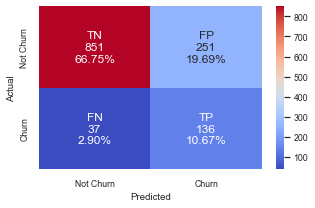

In [53]:
predict(grid_search)

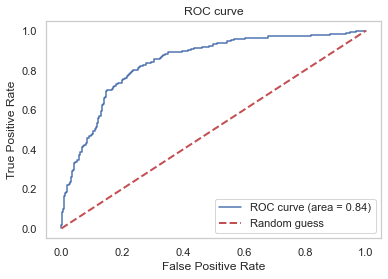

In [54]:
 plot_roc(grid_search, X_test, y_test)

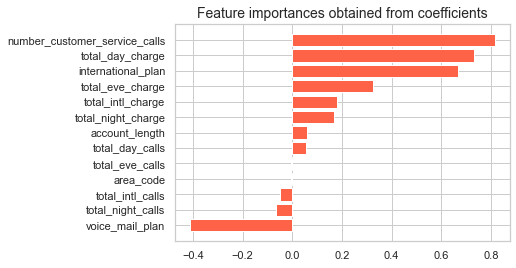

In [55]:
# dataframe fitur
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': model.coef_[0]})
importances = importances.sort_values(by='Importance', ascending=True)

# -----------------------------------------------------------------------
# visualisasi
plt.barh(y=importances['Attribute'], width=importances['Importance'], color='tomato')
plt.title('Feature importances obtained from coefficients', size=14)
plt.show()

### Random Forest Classifier
---


In [56]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, class_weight='balanced')
kfold = model_selection.KFold(n_splits=10,shuffle = True, random_state=42)
rf_model = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring= 'recall')
print('Recall Mean:', rf_model.mean().round(4))
print('Std:', rf_model.std().round(4))

Recall Mean: 0.678
Std: 0.0491


#### Hyperparameter Tuning

In [57]:
params ={'n_estimators': [100, 200, 300],
         'max_depth': [5, 10, 20],
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 2, 4]}

# -------------------------------------------------------------------------------
model = RandomForestClassifier(random_state=42, class_weight='balanced')
kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
grid_search = model_selection.GridSearchCV(model, param_grid = params, scoring = 'recall', cv = kfold)

grid_search.fit(X_train, y_train)
print('Best parameters: ', grid_search.best_params_)

Best parameters:  {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}


#### Predict and Evaluation

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      1102
           1       0.70      0.84      0.76       173

    accuracy                           0.93      1275
   macro avg       0.84      0.89      0.86      1275
weighted avg       0.94      0.93      0.93      1275

------------------------------------------------------- 

AUC Test score: 0.9259
AUC Train scores: 0.9419
------------------------------------------------------- 



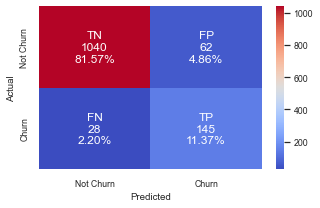

In [58]:
predict(grid_search)

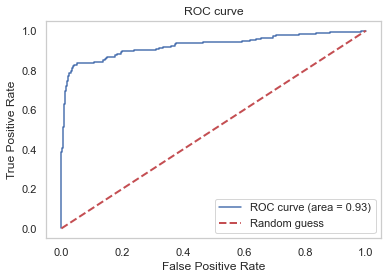

In [59]:
plot_roc(grid_search, X_test, y_test)

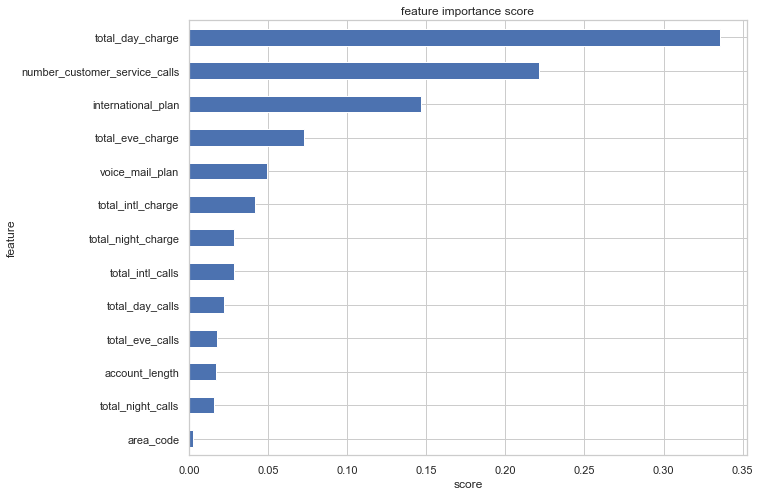

In [60]:
show_feature_importance(grid_search.best_estimator_)

### XGBoost
---

In [61]:
from sklearn import model_selection
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
kfold = model_selection.KFold(n_splits=10,shuffle = True, random_state=42)
xgb_model = model_selection.cross_val_score(xgb, X, y, cv=kfold, scoring= 'recall')
print('Recall Mean:', xgb_model.mean().round(4))
print('Std:', xgb_model.std().round(4))

Recall Mean: 0.7753
Std: 0.0455


#### Hyperparameter Tuning

In [62]:
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [100, 500, 1000],
    'scale_pos_weight': [5, 10, 15] # set the class weight
}

# ----------------------------------------------------------------------
model = XGBClassifier(random_state=42)
kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
grid_search = model_selection.GridSearchCV(model, param_grid = params, scoring = 'recall', cv = kfold)

grid_search.fit(X_train, y_train)
print('Best parameters: ', grid_search.best_params_)

Best parameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'scale_pos_weight': 15}


#### Predict and Evaluation

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.97      0.86      0.91      1102
           1       0.48      0.85      0.61       173

    accuracy                           0.85      1275
   macro avg       0.73      0.85      0.76      1275
weighted avg       0.91      0.85      0.87      1275

------------------------------------------------------- 

AUC Test score: 0.9238
AUC Train scores: 0.9527
------------------------------------------------------- 



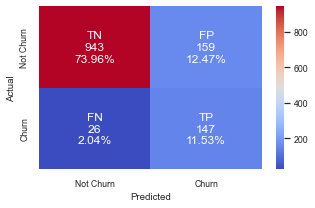

In [63]:
predict(grid_search)

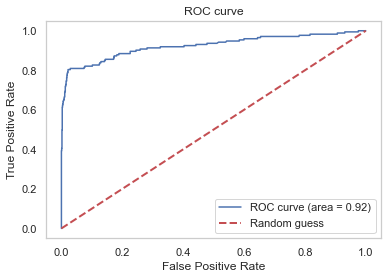

In [64]:
plot_roc(grid_search, X_test, y_test)

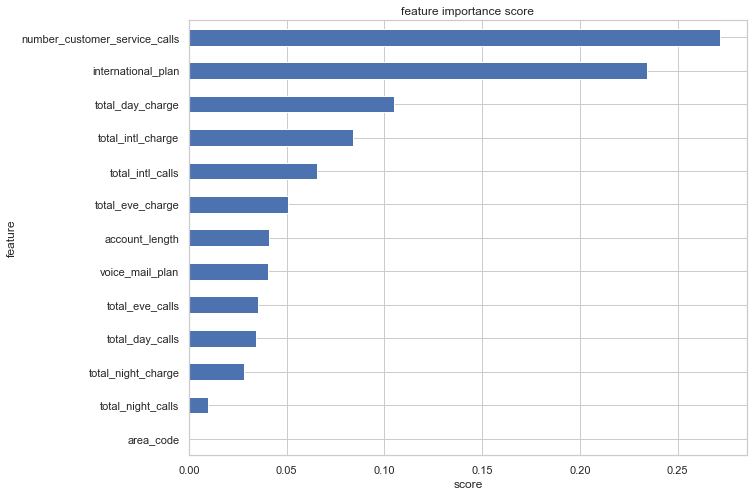

In [65]:
show_feature_importance(grid_search.best_estimator_)

### **Final Model**

In [66]:
results = pd.DataFrame([['Logistic Regression', 0.78, 0.84, 0.82],
                       ['Random Forest Classiefier', 0.89, 0.93, 0.94],
                       ['XGBoost Classiefier', 0.86, 0.92, 0.95]],
                        columns = ['Models', 'Recall', 'AUC', 'AUC Train'])

results = results.round({'Recall': 2, 'AUC': 2, 'AUC Train': 2})
results = results.sort_values(by=['Recall', 'AUC', 'AUC Train'], ascending=False)
results

,Models,Recall,AUC,AUC Train
1,Random Forest Classiefier,0.89,0.93,0.94
2,XGBoost Classiefier,0.86,0.92,0.95
0,Logistic Regression,0.78,0.84,0.82


In [67]:
from IPython.display import clear_output

%pip install shap

clear_output()

In [68]:
import shap

model_final = RandomForestClassifier(random_state=42, 
                               class_weight='balanced',
                               max_depth = 5,
                               min_samples_leaf = 2,
                               min_samples_split = 10,
                               n_estimators = 300)
model_final.fit(X_train, y_train)

explainer = shap.TreeExplainer(model_final)
shap_values = explainer.shap_values(X_test)

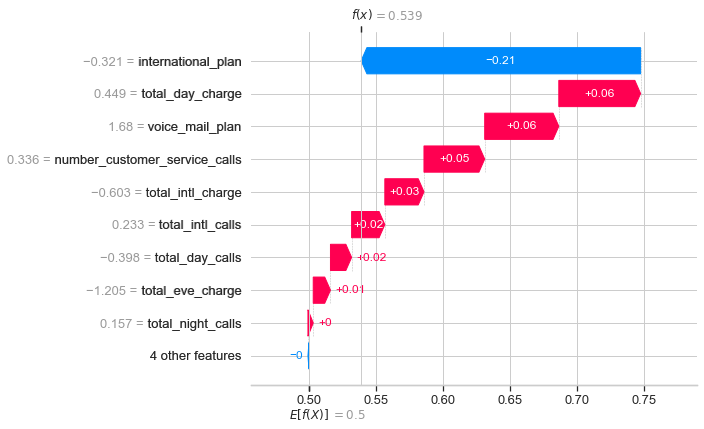

In [69]:
# Create a shap.Explanation object
# based on the SHAP values and feature names
expected_value = explainer.expected_value[1]  # Use the expected value for class 1
shap_exp = shap.Explanation(shap_values[0][1], feature_names=X_test.columns.values, 
                            data=X_test.iloc[0,:], 
                            base_values=expected_value)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_exp)

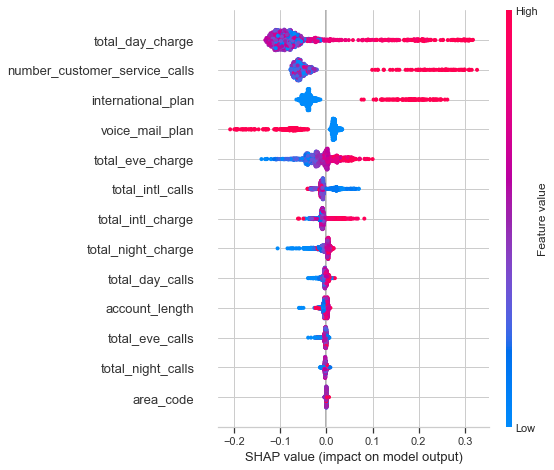

In [70]:
shap.summary_plot(shap_values[1], X_test)

## **Predict Data Test**

In [71]:
# load data test
url_test = 'https://drive.google.com/file/d/1lcPBOHjqtkz4xgwSdiak4CL2cLyip3AT/view?usp=sharing'
file_id_test = url_test.split('/')[-2]
dwn_url_test = 'https://drive.google.com/uc?id=' + file_id_test
# -------------------------------
df_test = pd.read_csv(dwn_url_test)

In [72]:
df_test.sample(3)

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
563,564,MN,151,area_code_415,no,yes,31,240.7,102,40.92,106.5,96,9.05,195.7,128,8.81,10.6,2,2.86,2
16,17,VT,135,area_code_415,no,no,0,151.7,82,25.79,119.0,105,10.12,180.0,100,8.10,10.5,6,2.84,0
528,529,WV,113,area_code_510,no,yes,28,264.4,93,44.95,222.8,79,18.94,213.7,88,9.62,10.0,4,2.70,1


### Overview Dataset

In [73]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [74]:
df_test.duplicated().sum()

0

- tidak ada duplikat dan missing value

In [75]:
df_setected.columns

Index(['account_length', 'area_code', 'international_plan', 'voice_mail_plan',
       'total_day_calls', 'total_day_charge', 'total_eve_calls',
       'total_eve_charge', 'total_night_calls', 'total_night_charge',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [76]:
feats =['account_length', 'area_code', 'international_plan', 'voice_mail_plan', 'total_day_calls', 'total_day_charge', 'total_eve_calls',
        'total_eve_charge', 'total_night_calls', 'total_night_charge', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']
X_test1 = df_test[feats]

In [77]:
le = LabelEncoder()
# ----------------------
for col in X_test1.columns:
    if X_test1[col].dtype == 'O':
        X_test1[col] = le.fit_transform(X_test1[col])

In [78]:
scaler = StandardScaler()
X_test1 = pd.DataFrame(scaler.fit_transform(X_test1), columns=X_test1.columns)

##Predict

In [79]:
model_rf = RandomForestClassifier(random_state=42, 
                               class_weight='balanced',
                               max_depth = 5,
                               min_samples_leaf = 2,
                               min_samples_split = 10,
                               n_estimators = 300)
model_rf.fit(X_train, y_train)
prediction = model_rf.predict(X_test1)

In [80]:
df_test1 = pd.read_csv(dwn_url_test)
submission = pd.DataFrame({
        'id': df_test1['id'],
        'churn': prediction
    })
submission.head()

,id,churn
0,1,0
1,2,1
2,3,1
3,4,0
4,5,0


In [82]:
df_test['churn'] = submission['churn']
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,1
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,...,76,26.11,203.0,99,9.14,13.1,6,3.54,4,1
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,...,111,18.55,129.6,121,5.83,8.1,3,2.19,3,0
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,...,112,23.55,250.7,115,11.28,15.5,5,4.19,3,0


In [83]:
df_test.to_csv('final.csv', index = False)